In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install explainerdashboard catboost

You should consider upgrading via the '/Users/oege/projects/venv/bin/python -m pip install --upgrade pip' command.


In [8]:
from catboost import CatBoostClassifier

from pdpbox import pdp

from explainerdashboard import *
from explainerdashboard.datasets import *

# CatBoostClassifier with numerical features only

In [13]:
X_train, y_train, X_test, y_test = titanic_survive()
model = CatBoostClassifier(n_estimators=50, max_depth=5).fit(X_train, y_train)
explainer = ClassifierExplainer(model, X_test, y_test, 
                                 cats=['Sex', 'Deck', 'Embarked'])  

Learning rate set to 0.137226
0:	learn: 0.6182998	total: 1.95ms	remaining: 95.7ms
1:	learn: 0.5713872	total: 4.58ms	remaining: 110ms
2:	learn: 0.5336549	total: 7.14ms	remaining: 112ms
3:	learn: 0.5171729	total: 9.31ms	remaining: 107ms
4:	learn: 0.4870231	total: 10.7ms	remaining: 96.1ms
5:	learn: 0.4639320	total: 11.9ms	remaining: 87.2ms
6:	learn: 0.4435348	total: 13.4ms	remaining: 82.2ms
7:	learn: 0.4331951	total: 15ms	remaining: 78.8ms
8:	learn: 0.4283486	total: 17.3ms	remaining: 78.9ms
9:	learn: 0.4149271	total: 20.7ms	remaining: 82.9ms
10:	learn: 0.4096740	total: 22.7ms	remaining: 80.6ms
11:	learn: 0.3992868	total: 24.2ms	remaining: 76.5ms
12:	learn: 0.3954266	total: 25.9ms	remaining: 73.7ms
13:	learn: 0.3904088	total: 27.1ms	remaining: 69.7ms
14:	learn: 0.3864549	total: 28.5ms	remaining: 66.5ms
15:	learn: 0.3799679	total: 29.8ms	remaining: 63.3ms
16:	learn: 0.3765663	total: 31.8ms	remaining: 61.6ms
17:	learn: 0.3734678	total: 33.6ms	remaining: 59.8ms
18:	learn: 0.3707320	total: 35.

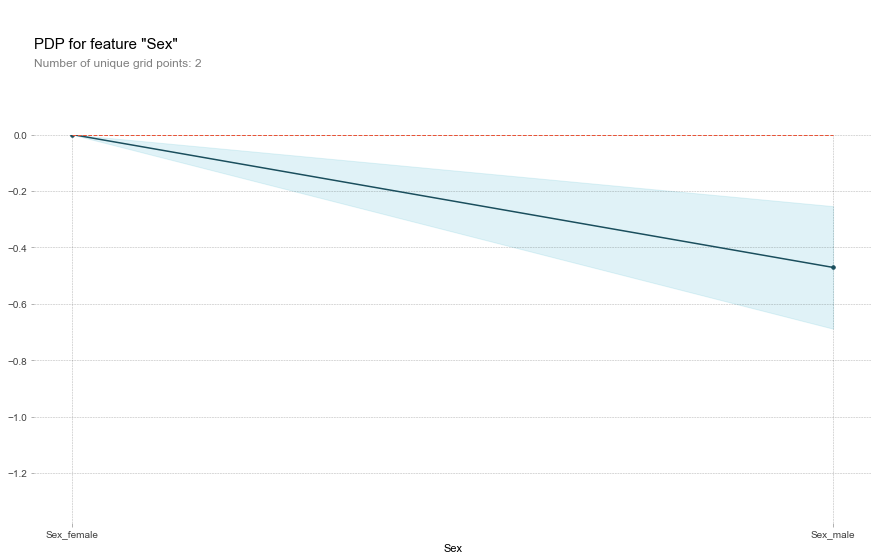

In [14]:
pdp_iso = pdp.pdp_isolate(
                model=model, dataset=X_test,
                model_features=X_test.columns, feature=['Sex_female', 'Sex_male'])
fig, axes = pdp.pdp_plot(pdp_iso, 'Sex')

# CatBoostClassifier with categorical features

In [15]:
X_cats, y_cats = explainer.X_cats, explainer.y
model = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0).fit(X_cats, y_cats, cat_features=[5, 6,7])

In [16]:

pdp_iso = pdp.pdp_isolate(
                model=model, dataset=X_cats,
                model_features=X_cats.columns, feature='Sex')

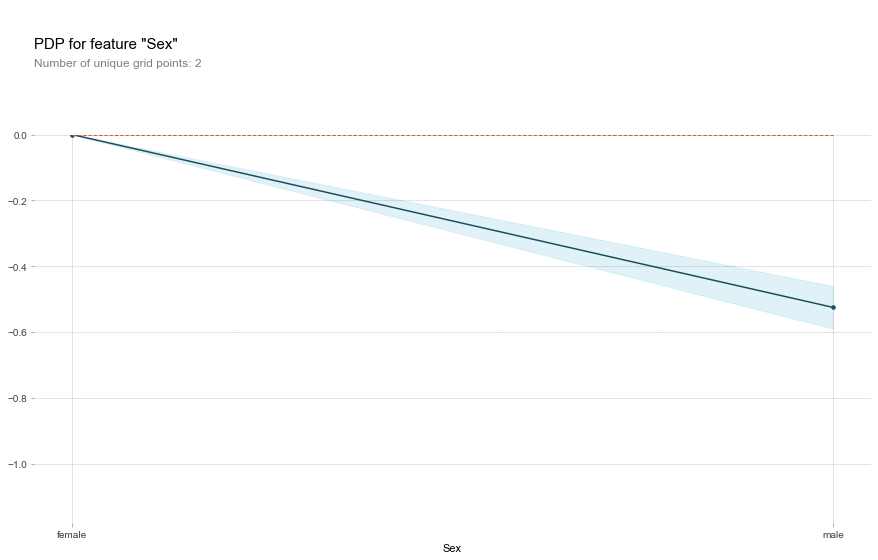

In [17]:
fig, axes = pdp.pdp_plot(pdp_iso, 'Sex')